In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
df.shape

(506, 15)

In [6]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

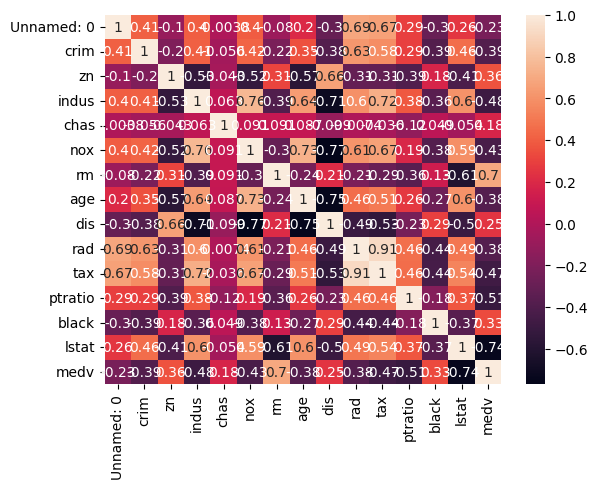

In [10]:
# Display correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
X = df[['ptratio','lstat']]
Y = df['medv']

In [13]:
def BuildModel(X, Y):
# 1. divide the dataset into training and testing 80%train 20%testing
# 2. Choose the model (linear regression)
# 3. Train the model using training data
# 4. Test the model using testing data
# 5. Improve the performance of the model
# Training and testing data
    from sklearn.model_selection import train_test_split
# Assign test data size 20%
    xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.20, random_state=0)
# Model selection and training
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model = model.fit(xtrain,ytrain) #Training
#Testing the model & show its accuracy / Performance
    ypred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    print('MAE:',mean_absolute_error(ytest,ypred))
    print("Model Score:",model.score(xtest,ytest))

In [14]:
BuildModel(X,Y)

MAE: 5.136709198623111
Model Score: 0.36774580178654837


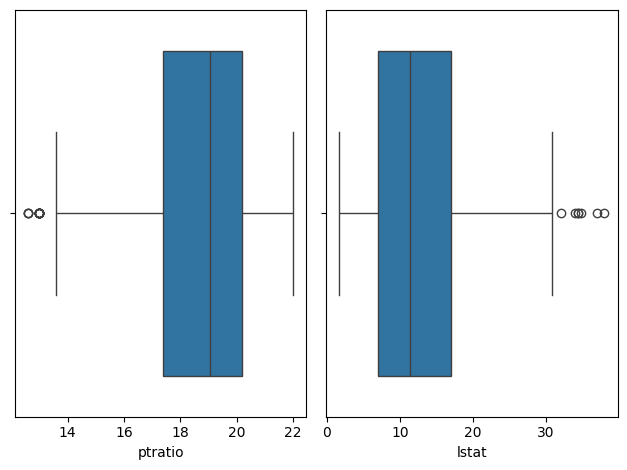

In [18]:
# Checking model score after removing outliers
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()

In [20]:
def RemoveOutlier(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3+1.5*IQR, Q1-1.5*IQR
    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    df = df[((df[var] >= low) & (df[var] <= high))]
    return df

In [22]:
df = RemoveOutlier(df, 'ptratio')
df = RemoveOutlier(df, 'lstat')

Highest allowed in variable: ptratio 24.4
lowest allowed in variable: ptratio 13.199999999999998
Total outliers in: ptratio : 15
Highest allowed in variable: lstat 32.09250000000001
lowest allowed in variable: lstat -7.847500000000005
Total outliers in: lstat : 6


In [23]:
# Choosing input and output variables from correlation matrix
X = df[['ptratio','lstat']]
Y = df['medv']
BuildModel(X, Y)

MAE: 4.529788999143725
Model Score: 0.5362875680057495


In [24]:
# after feature engineering selecting 3 variables
X = df[['rm','lstat', 'ptratio']]
Y = df['medv']
BuildModel(X, Y)

MAE: 4.030709795767343
Model Score: 0.5925717947605275
